[0.035575864713, 0.030505981688, 0.028276163984, 0.028065193138, 0.027794018841, 0.02739970865, 0.016697635995, 0.010369299012, 0.009616360694, 0.003351664697, 0.002052778313, 0.002052778313, 0.002052778313, 0.002052778313, 0.002052778313, 0.002052778313, 0.002052778313, 0.002052778313, 0.002052778313, 0.002052778313, 0.002052778313, 0.002052778313, 0.002052778313, 0.002052778313]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


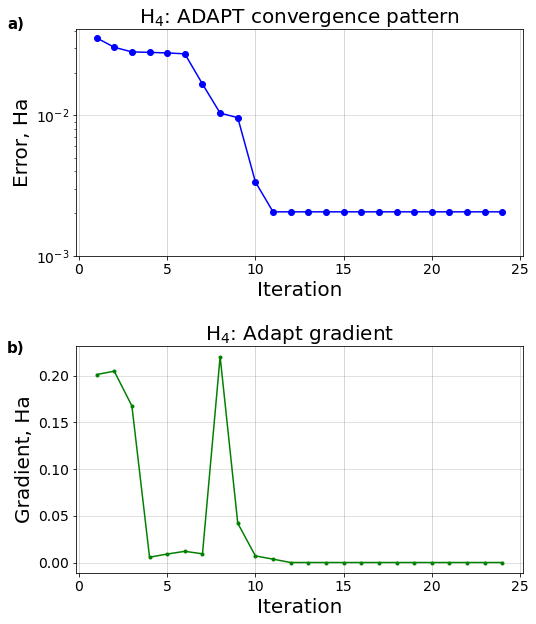

In [20]:
import matplotlib.pyplot as plt
import numpy as np

import pickle5 as pickle








file_to_open= "slurm_minimum_energy"
    
iteration=[]
errors=[]
gradients=[]

file = open(file_to_open,'rb').readlines()
for line_number in range(len(file)):
    line=file[line_number].decode("utf-8")
    if len(line)>45 and line[:45]=="                         ADAPT-VQE iteration:":
        if float(file[line_number+4].decode("utf-8")[7:21])>0:
            iteration.append(int(line[47:]))
            error_line=file[line_number+4].decode("utf-8")
            errors.append(float(file[line_number+4].decode("utf-8")[14:28]))
            gradients.append(float(file[line_number+4].decode("utf-8")[46:60]))


print(errors)
print(iteration)


fig, plots = plt.subplots(2, 1, figsize=(8,10))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)


plots[0].set_title('H$_4$: ADAPT convergence pattern',fontsize=20)
plots[0].grid(axis='y', alpha=0.75)
plots[0].set_xlabel('Iteration',fontsize=20)
plots[0].set_ylabel('Error, Ha',fontsize=20)



    


plots[0].plot(iteration,errors,linestyle='-', marker='o', color='b')
plots[0].grid( linestyle = '-', linewidth = 0.5)
plots[0].set_yscale("log")


plots[1].set_title('H$_4$: Adapt gradient',fontsize=20)
plots[1].grid(axis='y', alpha=0.75)
plots[1].set_xlabel('Iteration',fontsize=20)
plots[1].set_ylabel('Gradient, Ha',fontsize=20)

plots[1].plot(iteration,gradients,linestyle='-', marker='.', color='g')
plots[1].grid( linestyle = '-', linewidth = 0.5)

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

plots[0].set_yticks([0.001, 0.01])


fig.text(0.005, 0.88, "a)", fontdict=None,fontsize=15,fontweight="bold")
fig.text(0.005, 0.43, "b)", fontdict=None,fontsize=15,fontweight="bold")

fig.savefig('ErrorGradient.pdf',bbox_inches = 'tight',
    pad_inches = 0)  
plt.show()


# Set a clean upper y-axis limit.
